In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
#Load in files
with open("optimization_sigcond_ratio.pkl", "rb") as fid:
    optimization = pickle.load(fid)
    
with open("objective_sigcond_ratio.pkl", "rb") as fid:
    objective = pickle.load(fid)
    
with open("simulation_sigcond_ratio.pkl", "rb") as fid:
    simulation = pickle.load(fid)

In [25]:
with open("Robust_sigcond_full.pkl", "rb") as fid:
    robust = pickle.load(fid)
    
robust = np.array(robust)
robust.mean()

-48.4589607065529

In [14]:
#Returned optimization output
optimization

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence
0,75.0,0.857837,0.000000,0.617048,-45.650580,0.0
1,62.0,0.510176,0.059498,0.837990,-47.467132,41.0
2,49.0,0.983833,0.146466,0.613987,-47.493665,44.0
3,33.0,0.989005,0.189161,0.356634,-47.810663,48.0
4,84.0,0.274159,0.566336,0.319159,-48.567406,49.0


In [15]:
#Create DF for objective data
objectiveDF = pd.DataFrame.from_records(objective, columns=['Mutation Rate','Crossover Rate','Fitness','Convergence'])
objectiveDF['Convergence'] = objectiveDF['Convergence'].astype(int)
objectiveDF['Fitness'] = objectiveDF['Fitness']*-1
objectiveDF

,population,pop_ratio,mut_rate,cov_rate,Fitness,Convergence
0,31.0,0.058576,0.980442,0.253543,48.373561,49
1,77.0,0.863157,0.274245,0.480409,48.076892,49
2,70.0,0.221076,0.589968,0.898770,48.402888,49
3,93.0,0.928285,0.333842,0.782069,48.265029,49
4,81.0,0.800321,0.780049,0.769805,48.309181,49
...,...,...,...,...,...,...
270,12.0,0.581652,0.548820,0.259650,47.082912,49
271,35.0,0.960947,0.285297,0.214333,47.606803,49
272,33.0,0.989005,0.189161,0.356634,47.810663,48
273,9.0,0.596418,0.438857,0.337117,46.781102,49


[Text(0.5, 1.0, 'Fitness vs. Convergence for All Simulations')]

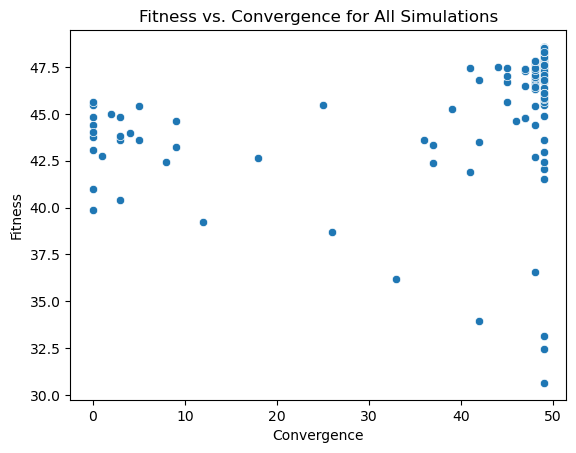

In [16]:
# Plot convergence by fitness (hypervolume)
sns.scatterplot(x='Convergence', y='Fitness', data= objectiveDF).set(title='Fitness vs. Convergence for All Simulations')

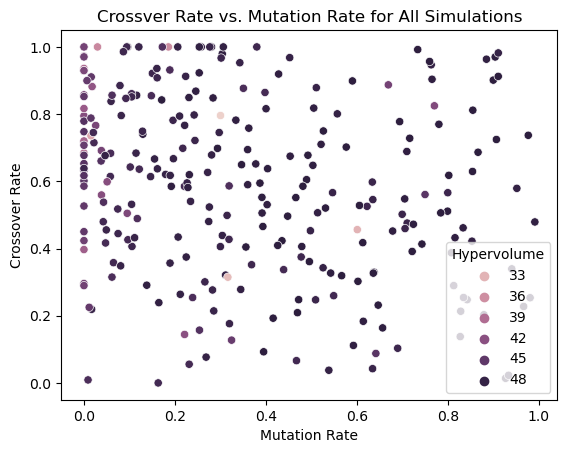

In [17]:
# Loot at the fitness (hypervolume) of all simulations
sns.scatterplot(x='mut_rate', y='cov_rate', data= objectiveDF, 
                hue = 'Fitness').set(title='Crossver Rate vs. Mutation Rate for All Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.legend(title = "Hypervolume", loc = "lower right")
plt.savefig("Success_sigcond_ratio")

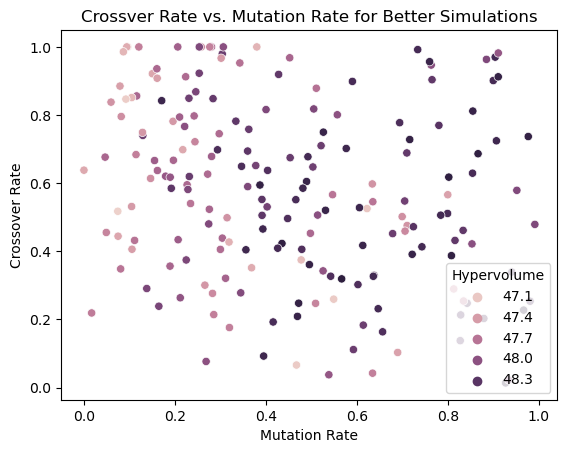

In [18]:
# Loot at the fitness (hypervolume) of more successful simulations
better = objectiveDF[objectiveDF['Fitness'] > 47]
sns.scatterplot(x='mut_rate', y='cov_rate', data= better, 
                hue = 'Fitness').set(title='Crossver Rate vs. Mutation Rate for Better Simulations')
plt.ylabel("Crossover Rate")
plt.xlabel("Mutation Rate")
plt.legend(title = "Hypervolume", loc = "lower right")
plt.savefig("Success_better_sigcond_ratio")

## Successful Runs

[Text(0.5, 1.0, 'Mutation Rate vs. Convergence for All Simulations')]

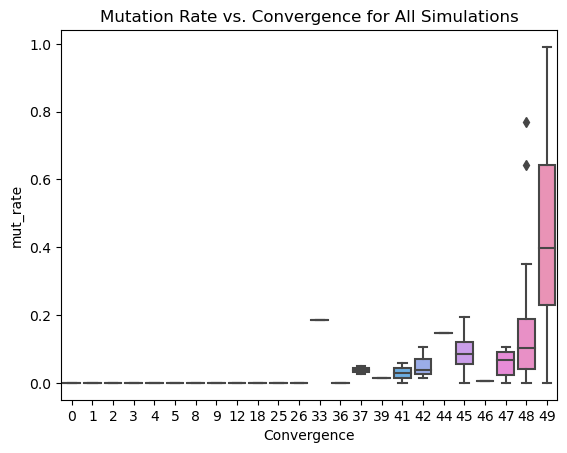

In [19]:
# Loot at the mutation rate by convergence
sns.boxplot(x='Convergence', y='mut_rate', data= objectiveDF).set(title='Mutation Rate vs. Convergence for All Simulations')

[Text(0.5, 1.0, 'Crossover Rate vs. Convergence for All Simulations')]

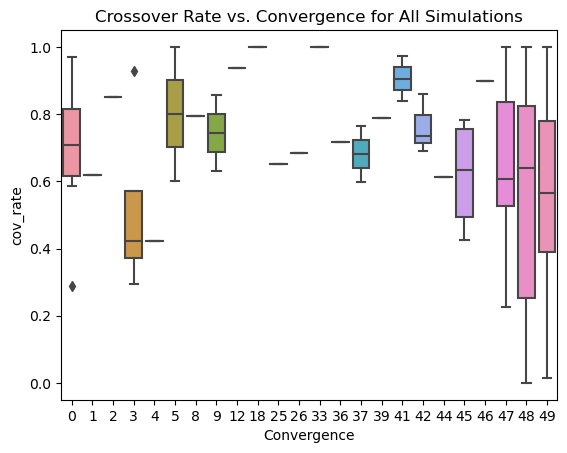

In [20]:
# Look at the crossover rate by convergence
sns.boxplot(x='Convergence', y='cov_rate', data= objectiveDF).set(title='Crossover Rate vs. Convergence for All Simulations')

In [21]:
groups_size = pd.DataFrame(objectiveDF.groupby('Convergence').size(), columns = ['Convergence'])
convergence = groups_size['Convergence'].index
size = groups_size['Convergence']
group_size = pd.DataFrame({'Convergence':convergence, 'Size':size})

[Text(0.5, 1.0, 'Number of Simulations by Convergence')]

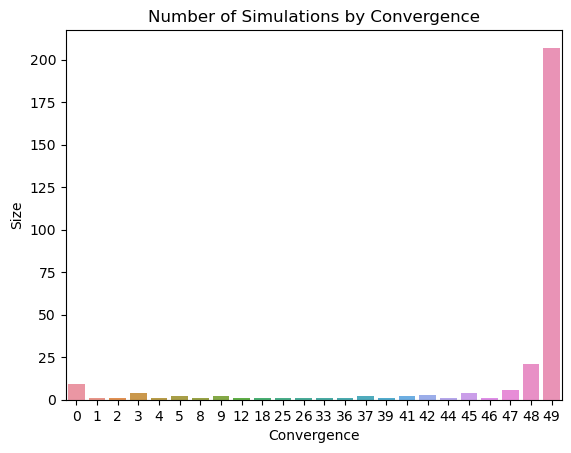

In [22]:
# Plot the number of simulations with each convergence value
sns.barplot(data= group_size, x="Convergence", y="Size").set(title='Number of Simulations by Convergence')